In [11]:
#load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
#read txt file 
data = pd.read_csv("car.txt", delimiter=',')

In [15]:
# rename the columns names
data.rename(columns = {'vhigh':'buying'}, inplace = True)
data.rename(columns = {'vhigh.1':'maint'}, inplace = True)
data.rename(columns = {'2':'doors'}, inplace = True)
data.rename(columns = {'2.1':'persons'}, inplace = True)
data.rename(columns = {'small':'lug_boot'}, inplace = True)
data.rename(columns = {'low':'safety'}, inplace = True)
data.rename(columns = {'unacc':'class'}, inplace = True)

In [16]:
# columns names
data.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [17]:
data.head(5)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [20]:
#types
data.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

In [192]:
#The sum of missing values
data.isna().sum()
#Missing Attribute Values: none

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [23]:
#unique value for each columns
print(data["buying"].unique())
print(data["maint"].unique())
print(data["doors"].unique())
print(data["persons"].unique())
print(data["lug_boot"].unique())
print(data["safety"].unique())
print(data["class"].unique())

['vhigh' 'high' 'med' 'low']
['vhigh' 'high' 'med' 'low']
['2' '3' '4' '5more']
['2' '4' 'more']
['small' 'med' 'big']
['med' 'high' 'low']
['unacc' 'acc' 'vgood' 'good']


In [28]:
#show statistical data
data.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [29]:
#count duplicated
data.duplicated().sum() 

0

high     432
med      432
low      432
vhigh    431
Name: buying, dtype: int64


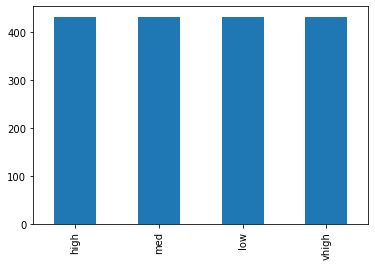

In [30]:
print(data["buying"].value_counts())
data["buying"].value_counts().plot.bar()
plt.show()

high     432
med      432
low      432
vhigh    431
Name: maint, dtype: int64


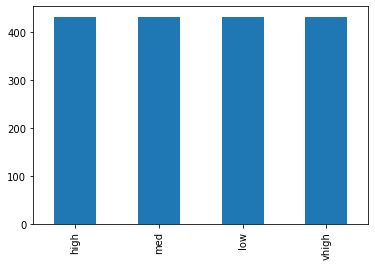

In [59]:
print(data["maint"].value_counts())
data["maint"].value_counts().plot.bar()
plt.show()

med      576
big      576
small    575
Name: lug_boot, dtype: int64


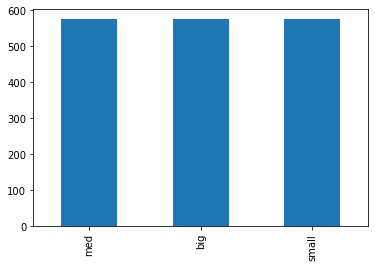

In [60]:
print(data["lug_boot"].value_counts())
data["lug_boot"].value_counts().plot.bar()
plt.show()

med     576
high    576
low     575
Name: safety, dtype: int64


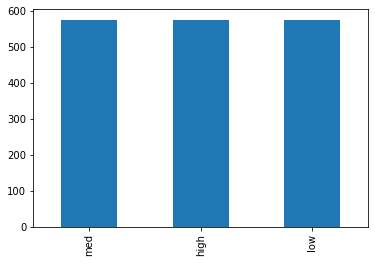

In [66]:
print(data["safety"].value_counts())
data["safety"].value_counts().plot.bar()
plt.show()

In [ ]:
# all features  are balance

In [187]:
def relationship(data,colunm_name,target):
    plt.figure(figsize=(8,5))
    plt.title('The relationship between ' + colunm_name +' and class')
    print(data.groupby([colunm_name, target]).size())
    data.groupby([colunm_name, target]).size().plot.bar()
    plt.show() 

buying  class
high    acc      108
        unacc    324
low     acc       89
        good      46
        unacc    258
        vgood     39
med     acc      115
        good      23
        unacc    268
        vgood     26
vhigh   acc       72
        unacc    359
dtype: int64


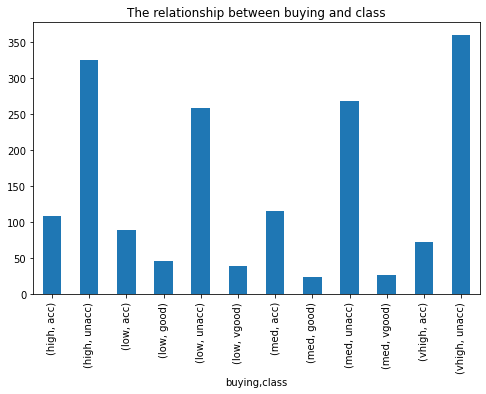

In [188]:
relationship(data,'buying','class')

maint  class
high   acc      105
       unacc    314
       vgood     13
low    acc       92
       good      46
       unacc    268
       vgood     26
med    acc      115
       good      23
       unacc    268
       vgood     26
vhigh  acc       72
       unacc    359
dtype: int64


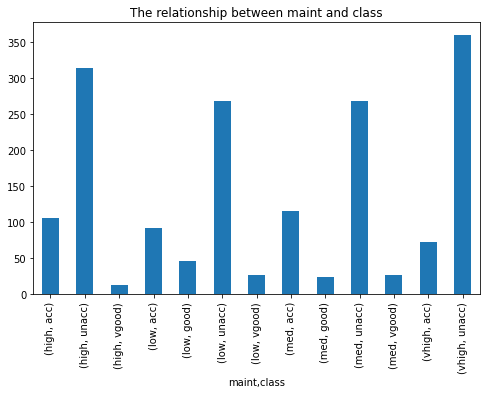

In [189]:
relationship(data,'maint','class')

lug_boot  class
big       acc      144
          good      24
          unacc    368
          vgood     40
med       acc      135
          good      24
          unacc    392
          vgood     25
small     acc      105
          good      21
          unacc    449
dtype: int64


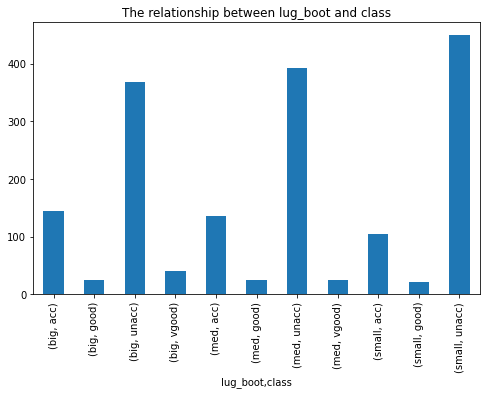

In [190]:
relationship(data,'lug_boot','class')

safety  class
high    acc      204
        good      30
        unacc    277
        vgood     65
low     unacc    575
med     acc      180
        good      39
        unacc    357
dtype: int64


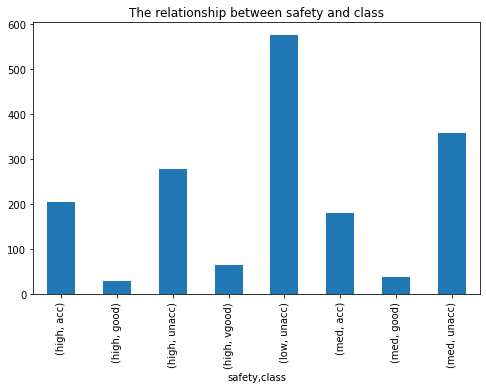

In [191]:
relationship(data,'safety','class')

In [177]:
def twoway_table_relative(data,colunm_name,target):
    twowaytable=pd.crosstab(df[target],df[colunm_name],margins=True)
    """
    builds a cross-tabulation table that can show the 
    frequency with which certain groups of data appear.
    """
    print(twowaytable)
    relative_table = round(twowaytable/twowaytable.loc["All"], 2)
    """
    a relative frequency table that tells frequencies instead of counts.
    """
    print("___"*13)
    print(relative_table)
    relative_table.plot.bar()    
    plt.show()

buying  high  low  med  vhigh   All
class                              
acc      108   89  115     72   384
good       0   46   23      0    69
unacc    324  258  268    359  1209
vgood      0   39   26      0    65
All      432  432  432    431  1727
_______________________________________
buying  high   low   med  vhigh   All
class                                
acc     0.25  0.21  0.27   0.17  0.22
good    0.00  0.11  0.05   0.00  0.04
unacc   0.75  0.60  0.62   0.83  0.70
vgood   0.00  0.09  0.06   0.00  0.04
All     1.00  1.00  1.00   1.00  1.00


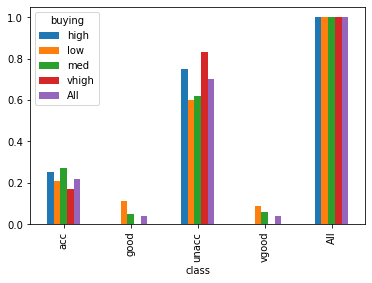

In [178]:
twoway_table_relative(data,'buying','class')

maint  high  low  med  vhigh   All
class                             
acc     105   92  115     72   384
good      0   46   23      0    69
unacc   314  268  268    359  1209
vgood    13   26   26      0    65
All     432  432  432    431  1727
_______________________________________
maint  high   low   med  vhigh   All
class                               
acc    0.24  0.21  0.27   0.17  0.22
good   0.00  0.11  0.05   0.00  0.04
unacc  0.73  0.62  0.62   0.83  0.70
vgood  0.03  0.06  0.06   0.00  0.04
All    1.00  1.00  1.00   1.00  1.00


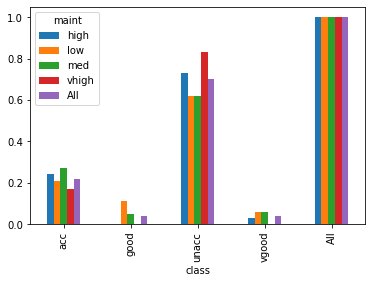

In [179]:
twoway_table_relative(data,'maint','class')

lug_boot  big  med  small   All
class                          
acc       144  135    105   384
good       24   24     21    69
unacc     368  392    449  1209
vgood      40   25      0    65
All       576  576    575  1727
_______________________________________
lug_boot   big   med  small   All
class                            
acc       0.25  0.23   0.18  0.22
good      0.04  0.04   0.04  0.04
unacc     0.64  0.68   0.78  0.70
vgood     0.07  0.04   0.00  0.04
All       1.00  1.00   1.00  1.00


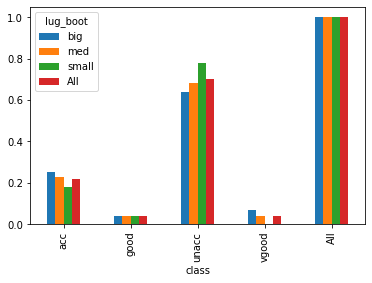

In [180]:
twoway_table_relative(data,'lug_boot','class')

In [ ]:
25% of cars with a big luggage boot  was acceptable.
4% of cars with a big luggage boot was  good.
64% of cars with a med  maint price was unacceptable.
7% of cars with a big luggage boot was very good.
______________________________________________________
23% of cars with a med luggage boot acceptable.
4% of cars with a med luggage boot was good.
68% of cars with a med luggage boot was unacceptable.
4% of cars with a med luggage boot was very good.
_______________________________________________________
18% of cars with a small luggage boot was acceptable.
4% of cars with a small luggage boot was good.
78% of cars with a small luggage boot was acceptable.

safety  high  low  med   All
class                       
acc      204    0  180   384
good      30    0   39    69
unacc    277  575  357  1209
vgood     65    0    0    65
All      576  575  576  1727
_______________________________________
safety  high  low   med   All
class                        
acc     0.35  0.0  0.31  0.22
good    0.05  0.0  0.07  0.04
unacc   0.48  1.0  0.62  0.70
vgood   0.11  0.0  0.00  0.04
All     1.00  1.0  1.00  1.00


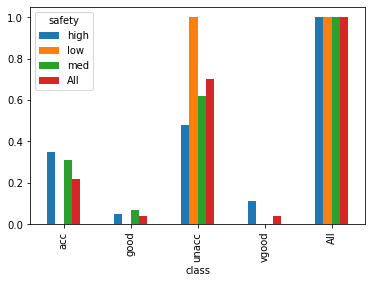

In [181]:
twoway_table_relative(data,'safety','class')

In [ ]:
35% of cars with a big safety was acceptable.
5% of cars with a big safety was  good.
48% of cars with a med safety was unacceptable.
11% of cars with a big safety was very good.
______________________________________________________
100% of cars with a med safety was unacceptable.
_______________________________________________________
31% of cars with a small safety was acceptable.
7% of cars with a small safety was good.
62% of cars with a small safety was unacceptable.